# baostock

获取K线数据

bs.query_history_k_data_plus(
    code,
    fields,
    start_date=None,
    end_date=None,
    frequency='d',
    adjustflag='3',
)

参数说明：

frequency：数据类型，默认为d，日k线；d=日k线、w=周、m=月、5=5分钟、15=15分钟、30=30分钟、60=60分钟k线数据，不区分大小写
> 指数没有分钟线数据(需要tushare补充)

> 周线每周最后一个交易日才可以获取，月线每月最后一个交易日才可以获取

In [1]:
import baostock as bs
import pandas as pd
import numpy as np

In [30]:
# 封装函数
def baostock_get_history_k_data(code,start_date,end_date,frequency,adjustflag="3"):
    lg = bs.login()
    rs = bs.query_history_k_data_plus(code,"date,open,high,low,close,preclose,volume,amount,turn,tradestatus,pctChg,isST",
                                        start_date, end_date, frequency, adjustflag)
    data_list = []
    while (rs.error_code == '0') & rs.next():
        data_list.append(rs.get_row_data())
    result = pd.DataFrame(data_list, columns=rs.fields, dtype=np.float)
    result["turn"] = result["turn"]*100
    result["amount"] = result["amount"]/100000000
    result.set_index("date",inplace=True)
    del rs.fields[0]
    decimals = pd.Series([2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0], index=rs.fields)
    result = result.round(decimals)
    return result

In [12]:
lg = bs.login()

login success!


In [84]:
rs = bs.query_history_k_data_plus("sh.600000",
    "date,open,high,low,close,preclose,volume,amount,turn,tradestatus,pctChg,isST",
    start_date='2017-07-01', end_date='2017-12-31',
    frequency="d", adjustflag="3")

data_list = []
while (rs.error_code == '0') & rs.next():
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields, dtype=np.float)

result["turn"] = result["turn"]*100
result.set_index("date",inplace=True)

del rs.fields[0]
decimals = pd.Series([2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0], index=rs.fields)
result = result.round(decimals)

In [85]:
result

,open,high,low,close,preclose,volume,amount,turn,tradestatus,pctChg,isST
date,,,,,,,,,,,
2017-07-03,12.64,12.65,12.47,12.56,12.65,38778949.0,486264672.0,13.80,1.0,-0.71,0.0
2017-07-04,12.55,12.58,12.41,12.55,12.56,36659128.0,458434432.0,13.04,1.0,-0.08,0.0
2017-07-05,12.50,12.65,12.47,12.62,12.55,26470507.0,332542464.0,9.42,1.0,0.56,0.0
2017-07-06,12.62,12.72,12.51,12.66,12.62,37414241.0,471582096.0,13.31,1.0,0.32,0.0
2017-07-07,12.62,12.69,12.55,12.60,12.66,24667294.0,311101536.0,8.78,1.0,-0.47,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,12.61,12.68,12.56,12.59,12.62,19306662.0,243553698.0,6.87,1.0,-0.24,0.0
2017-12-26,12.57,12.66,12.56,12.64,12.59,15225722.0,192219131.0,5.42,1.0,0.40,0.0
2017-12-27,12.65,12.66,12.53,12.62,12.64,32731881.0,412197987.0,11.65,1.0,-0.16,0.0


In [6]:
rs2 = bs.query_history_k_data_plus("sh.000001",
    "date,code,open,high,low,close,preclose,volume,amount,pctChg",
    start_date='2020-03-10', end_date='2020-04-03', frequency="d")

# 综合指数，例如：sh.000001 上证指数，sz.399106 深证综指 等；
# 规模指数，例如：sh.000016 上证50，sh.000300 沪深300，sh.000905 中证500，sz.399001 深证成指等

In [7]:
sh_data = []
while (rs2.error_code == '0') & rs2.next():
    # 获取一条记录，将记录合并在一起
    sh_data.append(rs2.get_row_data())
result2 = pd.DataFrame(sh_data, columns=rs2.fields)

In [8]:
result2

,date,code,open,high,low,close,preclose,volume,amount,pctChg
0,2020-03-10,sh.000001,2918.9347,3000.2963,2904.7989,2996.7618,2943.2907,39329664800,425017184790.9000,1.816711
1,2020-03-11,sh.000001,3001.7616,3010.0286,2968.5174,2968.5174,2996.7618,35247097000,378766618968.3000,-0.942497
2,2020-03-12,sh.000001,2936.0163,2944.4651,2906.2838,2923.4856,2968.5174,30777845700,328209202377.8000,-1.516979
3,2020-03-13,sh.000001,2804.2322,2910.8812,2799.9841,2887.4265,2923.4856,36645043600,393019665228.0000,-1.233428
4,2020-03-16,sh.000001,2897.3009,2898.0349,2784.6616,2789.2537,2887.4265,35187866500,375627000794.2000,-3.400010
5,2020-03-17,sh.000001,2796.2840,2826.9068,2715.2213,2779.6407,2789.2537,30614967700,323012822799.1000,-0.344644
6,2020-03-18,sh.000001,2792.3221,2815.8737,2729.2423,2729.6185,2779.6407,28763249300,314897170509.9000,-1.799592
7,2020-03-19,sh.000001,2719.4063,2736.8200,2646.8048,2702.1296,2728.7563,30230274700,330518008489.8000,-0.975782
8,2020-03-20,sh.000001,2727.0186,2751.8964,2702.4933,2745.6182,2702.1296,25201950700,281583369664.4000,1.609419
9,2020-03-23,sh.000001,2677.5910,2703.3295,2656.5008,2660.1674,2745.6182,24982025000,268423241973.7000,-3.112261


In [18]:
rs2 = bs.query_history_k_data_plus("sz.399001",
    "date,code,open,high,low,close,preclose,volume,amount,pctChg",
    start_date='2020-03-10', end_date='2020-04-03', frequency="d")
data = []
while (rs2.error_code == '0') & rs2.next():
    # 获取一条记录，将记录合并在一起
    data.append(rs2.get_row_data())
result = pd.DataFrame(data, columns=rs2.fields)

In [34]:
df = baostock_get_history_k_data("sz.399001",start_date='2020-03-10', end_date='2020-04-03', frequency="d")
df

login success!


,open,high,low,close,preclose,volume,amount,turn,tradestatus,pctChg,isST
date,,,,,,,,,,,
2020-03-10,11016.92,11406.30,10916.95,11403.47,11108.55,5.813552e+10,6565.0,626.61,1.0,2.65,0.0
2020-03-11,11436.44,11444.78,11197.09,11200.05,11403.47,5.295802e+10,5941.0,570.65,1.0,-1.78,0.0
2020-03-12,11022.40,11070.41,10842.38,10941.01,11200.05,4.657079e+10,5094.0,501.78,1.0,-2.31,0.0
2020-03-13,10382.22,10956.51,10380.17,10831.12,10939.47,5.290045e+10,5737.0,569.45,1.0,-0.99,0.0
2020-03-16,10867.66,10867.66,10217.93,10253.28,10831.12,5.204826e+10,5877.0,560.27,1.0,-5.33,0.0
2020-03-17,10337.92,10449.33,9885.86,10202.75,10253.28,4.491643e+10,4951.0,483.52,1.0,-0.49,0.0
2020-03-18,10294.96,10479.78,10030.29,10035.36,10200.16,4.471348e+10,5125.0,487.18,1.0,-1.62,0.0
2020-03-19,10023.12,10101.80,9719.49,10019.86,10029.57,4.322377e+10,4919.0,464.94,1.0,-0.10,0.0
2020-03-20,10150.78,10174.51,9964.29,10150.13,10019.86,3.800470e+10,4355.0,408.61,1.0,1.30,0.0


# mplfinance

In [1]:
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

## 数据格式要求
index为data，且为日期格式（parse_dates=True或者to_datetime）

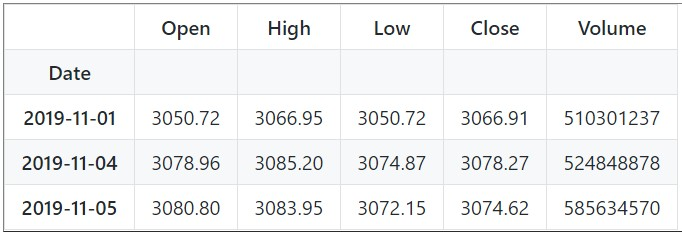

In [3]:
from IPython.display import Image
Image(filename='C:/Users/86188/Desktop/mplfinance.jpg',width=600,height=400)

In [5]:
daily = ts.get_k_data("601398", start="2020-03-01", end="2020-08-01")
daily["date"]=pd.to_datetime(daily["date"])
daily = daily.set_index("date")

## 蜡烛图

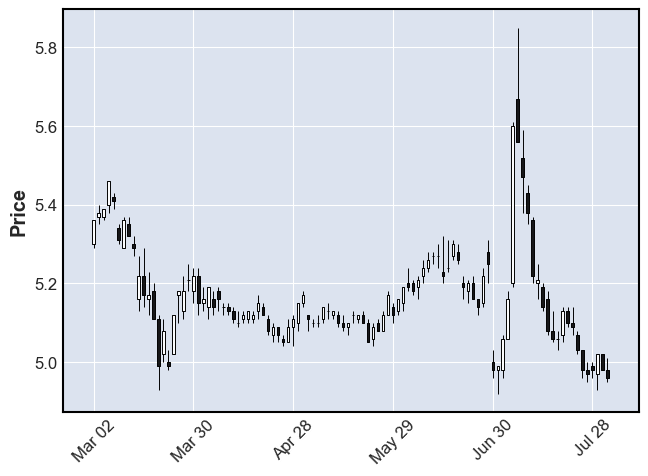

In [6]:
mpf.plot(daily,type='candle')

## 折线图

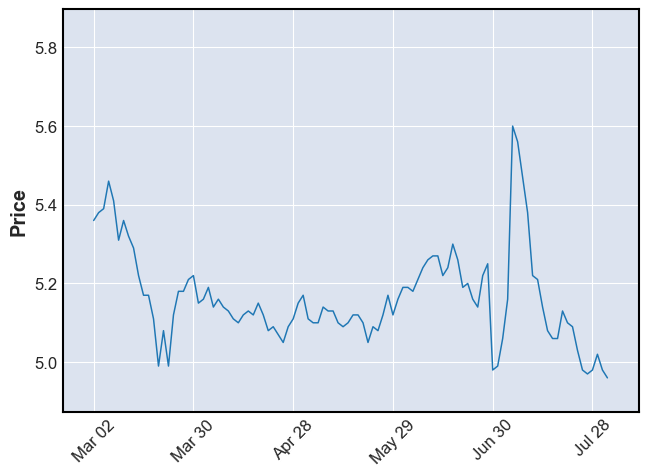

In [7]:
mpf.plot(daily,type='line')

## 添加MA线

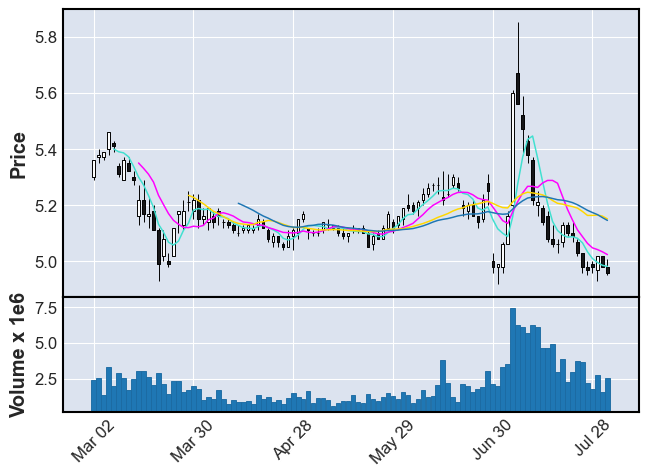

In [8]:
mpf.plot(daily,type='candle',mav=(5,10,20,30),volume=True)